_Используя набор данных iris.csv_ визуализируйте данные, **построив  графики и диаграммы следующих типов**:

1. линейные графики или scatter;
- график с сеткой;
- гистограмма с сеткой;
- линейная гистограмма;
- гистограмма с отклонениями;
- гистограмму с разными цветами;
- гистограмму c цветной сеткой.

In [370]:
import matplotlib
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x: iris.target_names[x])

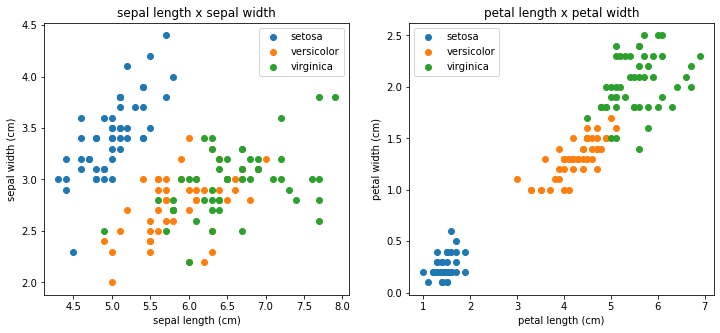

In [371]:
# Линейный график:

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
for target_name in sorted(set(iris_frame['name'])):
    plt.scatter(iris_frame[iris_frame.name == target_name]['sepal length (cm)'],
                iris_frame[iris_frame.name == target_name]['sepal width (cm)'], label=target_name)
plt.title('sepal length x sepal width')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.subplot(1, 2, 2)
for target_name in sorted(set(iris_frame['name'])):
    plt.scatter(iris_frame[iris_frame.name == target_name]['petal length (cm)'],
                iris_frame[iris_frame.name == target_name]['petal width (cm)'], label=target_name)
plt.title('petal length x petal width')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()


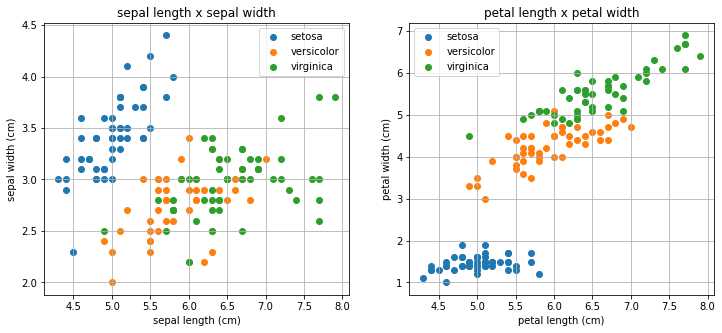

In [372]:
# График с сеткой:

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
for target_name in sorted(set(iris_frame['name'])):
    plt.scatter(iris_frame[iris_frame.name == target_name]['sepal length (cm)'],
                iris_frame[iris_frame.name == target_name]['sepal width (cm)'], label=target_name)
plt.title('sepal length x sepal width')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
for target_name in sorted(set(iris_frame['name'])):
    plt.scatter(iris_frame[iris_frame.name == target_name]['sepal length (cm)'],
                iris_frame[iris_frame.name == target_name]['petal length (cm)'],label=target_name)
plt.title('petal length x petal width')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.grid()
plt.legend()
plt.show()

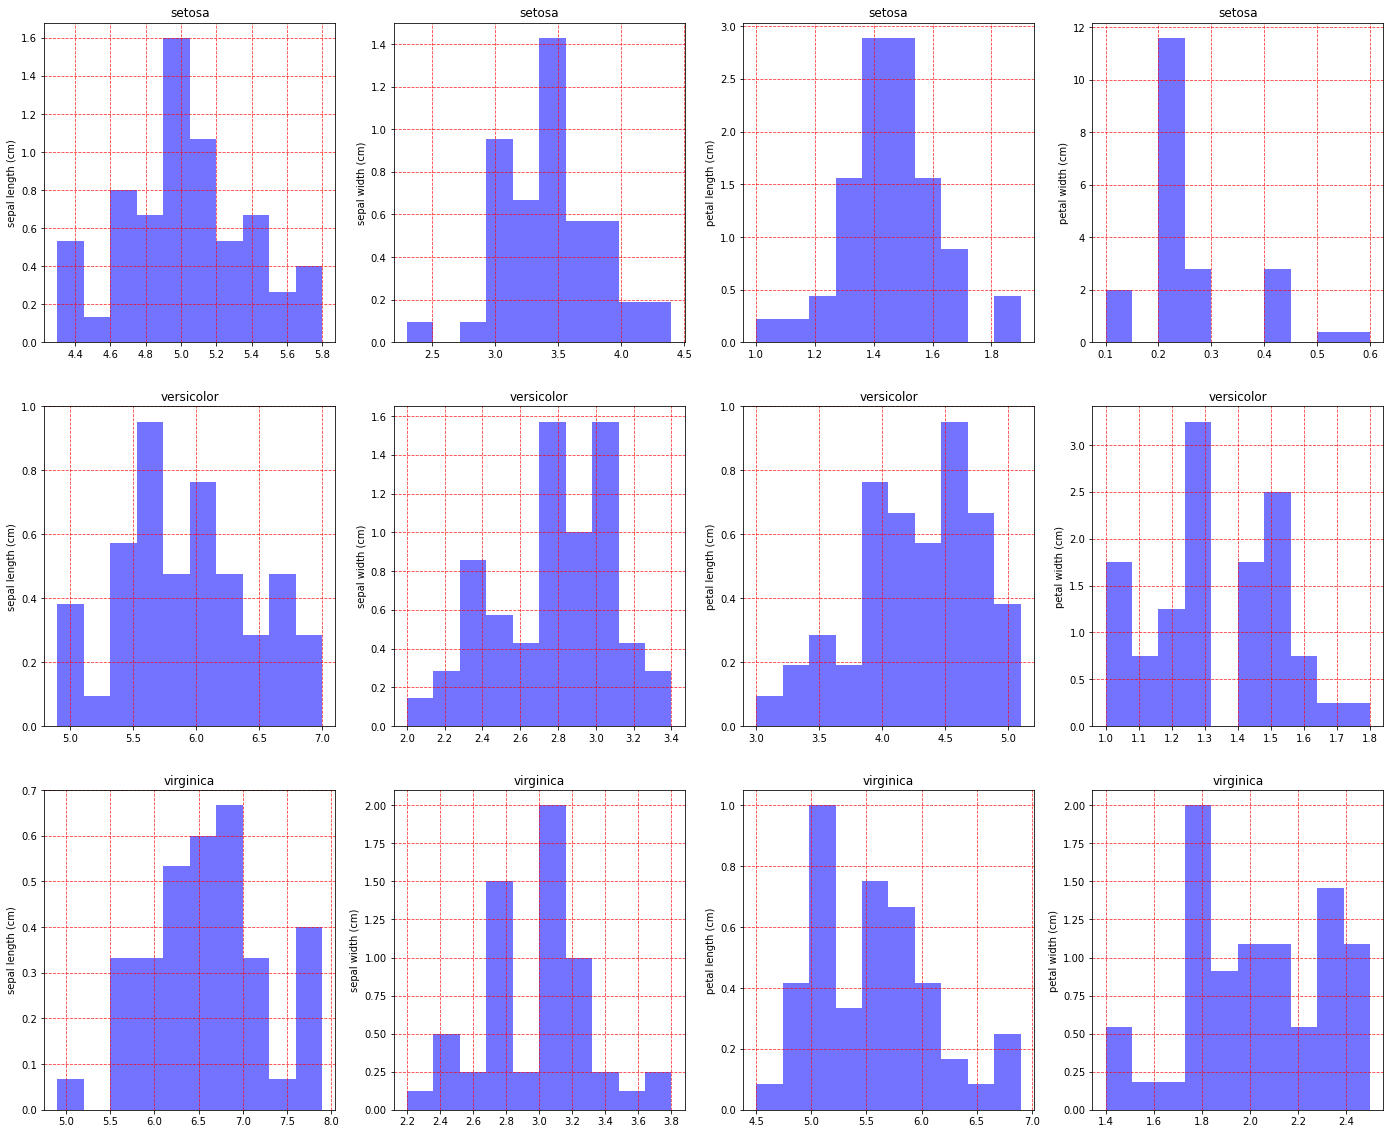

In [373]:
# Гистограмма с сеткой

plt.figure(figsize=[24, 20])
plot_number = 1
for target_name in sorted(set(iris_frame['name'])):
    for feature_name in iris_frame.columns[: - 2]:
        plt.subplot(3, 4, plot_number)
        plot_number += 1
        plt.hist(iris_frame[iris_frame.name == target_name][feature_name],density=True,
                 color = 'blue', alpha=0.55)
        plt.title(target_name)
        plt.ylabel(feature_name)
        plt.grid(visible=True, which='major', axis='both', color='r', linestyle='--',alpha=0.8)
        plt.grid(visible=True, which='minor', axis='both', color='b', linestyle='--',alpha=0.75)
plt.show()

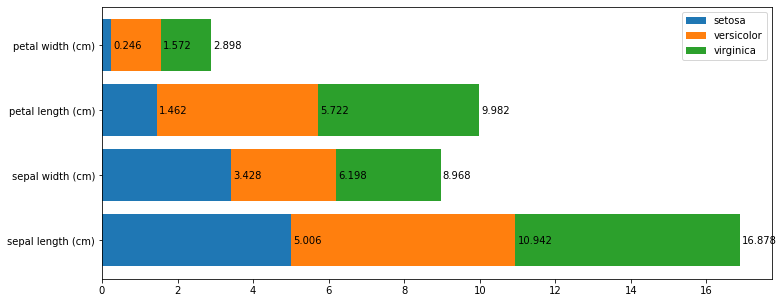

In [374]:
# Линейная гистограмма

plt.figure(figsize=[12, 5])
data_list = []
index = np.arange(4)
for target_name in sorted(set(iris_frame['name'])):
    temporary_data_list = []
    for feature_name in iris_frame.columns[: - 2]:
        temporary_data_list.append(stat.mean(iris_frame[iris_frame.name == target_name][feature_name]))
    data_list.append(np.array(temporary_data_list))

plot_1 = plt.barh(index, data_list[0])
plt.bar_label(plot_1,label_type='edge',padding=2)
plot_2 = plt.barh(index, data_list[1], left = data_list[0])
plt.bar_label(plot_2,label_type='edge',padding=2)
plot_3 = plt.barh(index, data_list[1], left = data_list[0]+data_list[1])
plt.bar_label(plot_3,label_type='edge',padding=2)
plt.yticks(index,iris_frame.columns[: - 2])
plt.legend([target_name for target_name in sorted(set(iris_frame['name']))])
plt.show()


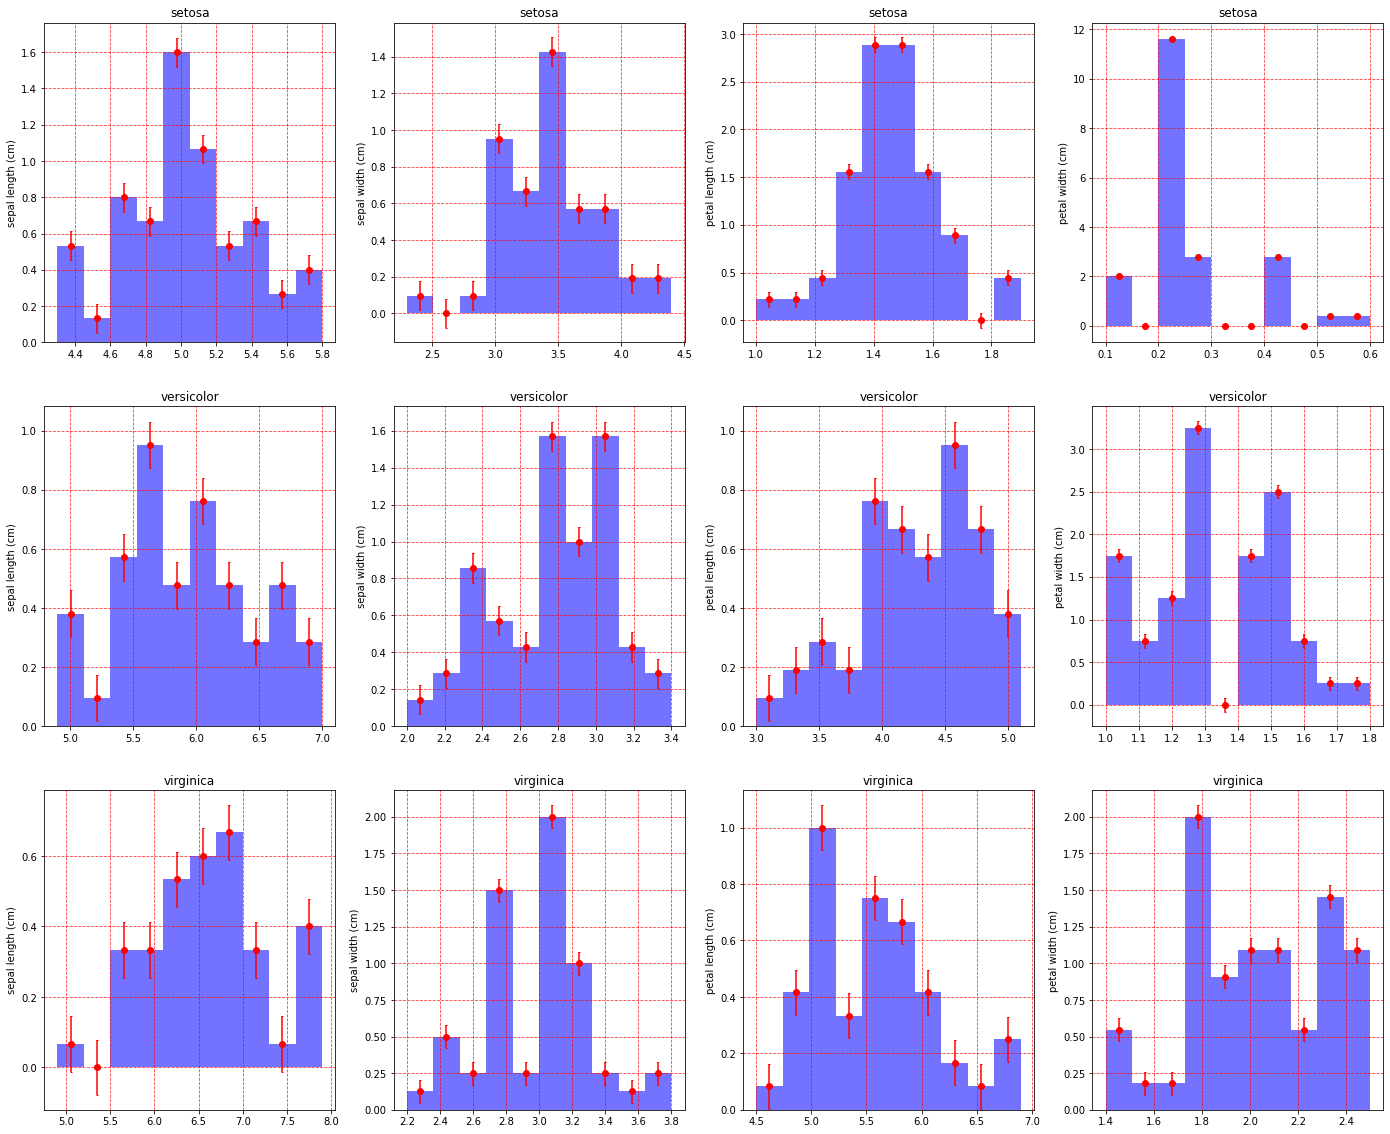

In [375]:
# Гистограмма с отклонениями

plt.figure(figsize=[24, 20])
plot_number = 1
for target_name in sorted(set(iris_frame['name'])):
    for feature_name in iris_frame.columns[: - 2]:
        plt.subplot(3, 4, plot_number)
        plot_number += 1
        bin_counts, bin_edges, patches =  plt.hist(iris_frame[iris_frame.name == target_name][feature_name],density=True,
                 color = 'blue', alpha=0.55)
        bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
        y_error = np.sqrt(bin_counts.size)*0.025
        plt.errorbar(x=bin_centres, y=bin_counts,
             yerr=y_error, color = 'red', fmt='o', capsize=1)
        plt.title(target_name)
        plt.ylabel(feature_name)
        plt.grid(visible=True, which='major', axis='both', color='r', linestyle='--',alpha=0.8)
        plt.grid(visible=True, which='minor', axis='both', color='b', linestyle='--',alpha=0.75)
plt.show()

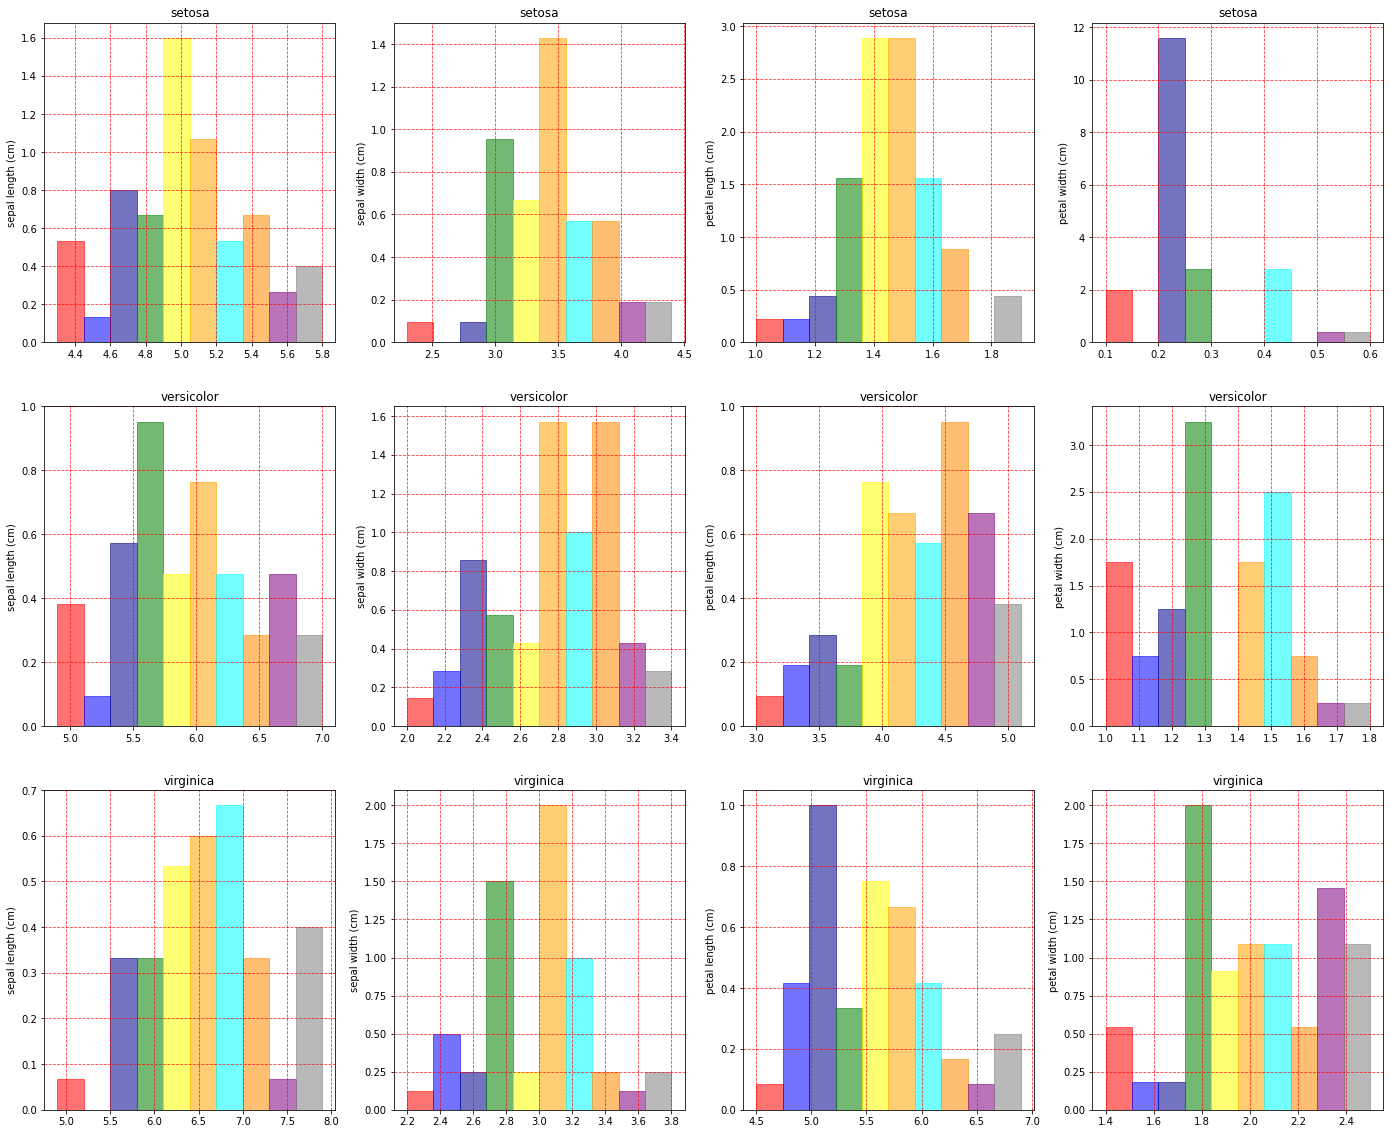

In [376]:
# Гистограмма с разными цветами

plt.figure(figsize=[24, 20])
plot_number = 1
for target_name in sorted(set(iris_frame['name'])):
    for feature_name in iris_frame.columns[: - 2]:
        plt.subplot(3, 4, plot_number)
        plot_number += 1
        bin_counts, bin_edges, patches =  plt.hist(iris_frame[iris_frame.name == target_name][feature_name],density=True,
                 alpha=0.55)
        colors    = ["red","blue","darkblue","green","yellow","orange","cyan","darkorange","purple","grey"]
        divisions = [0,1,2,3,4,5,6,7,8,9]
        for d in divisions:
            patches[d].set_color(colors[divisions.index(d)])
        plt.title(target_name)
        plt.ylabel(feature_name)
        plt.grid(visible=True, which='major', axis='both', color='r', linestyle='--',alpha=0.8)
        plt.grid(visible=True, which='minor', axis='both', color='b', linestyle='--',alpha=0.75)
plt.show()